**KNN IN BANKING**

In [1]:
!pip install gdown

In [2]:
import gdown

In [3]:
dataset = '1GCmHooX1xOvyIsvdDvGrMBzmJeC4zB0D'
url = f'https://drive.google.com/uc?id={dataset}'
output_path = '/dataset.csv'
gdown.download(url, output_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1GCmHooX1xOvyIsvdDvGrMBzmJeC4zB0D
To: /dataset.csv
100%|██████████| 3.75M/3.75M [00:00<00:00, 180MB/s]


'/dataset.csv'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind, f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import ttest_ind

In [5]:
df = pd.read_csv(output_path)
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [6]:
#change column y name to target

df = df.rename(columns={'y': 'target'})

In [7]:
print(df['target'].unique())

['no' 'yes']


In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
10747,36,technician,single,tertiary,no,0,no,no,unknown,17,jun,153,4,-1,0,unknown
26054,56,entrepreneur,married,secondary,no,196,no,no,cellular,19,nov,312,3,-1,0,unknown
9125,46,blue-collar,married,secondary,no,0,yes,no,unknown,5,jun,83,2,-1,0,unknown
41659,41,management,divorced,tertiary,no,3426,no,no,cellular,1,oct,302,1,119,5,success
4443,38,blue-collar,married,secondary,no,0,yes,no,unknown,20,may,90,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,44,housemaid,single,primary,no,1059,no,no,unknown,18,jun,2093,1,-1,0,unknown
44732,23,student,single,tertiary,no,508,no,no,cellular,8,sep,210,1,92,1,failure
38158,34,technician,divorced,tertiary,no,1317,yes,no,cellular,15,may,239,1,-1,0,unknown
860,33,retired,married,secondary,no,165,no,no,unknown,7,may,111,1,-1,0,unknown


In [10]:
y_train

,target
10747,no
26054,no
9125,no
41659,no
4443,no
...,...
11284,yes
44732,no
38158,no
860,no


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Assuming X_train and X_test have categorical features that need encoding
# You can choose the appropriate encoding method based on your data
# Here, we use OneHotEncoder for demonstration purposes

from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns in X_train
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a OneHotEncoder instance
enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on X_train and transform both X_train and X_test
X_train_encoded = enc.fit_transform(X_train[categorical_cols]).toarray()
X_test_encoded = enc.transform(X_test[categorical_cols]).toarray()

# Combine encoded features with numerical features
# Assuming X_train has numerical features
X_train_numerical = X_train.select_dtypes(include=['number'])
X_test_numerical = X_test.select_dtypes(include=['number'])

X_train = np.concatenate((X_train_encoded, X_train_numerical), axis=1)
X_test = np.concatenate((X_test_encoded, X_test_numerical), axis=1)

In [14]:
X_train

array([[36.,  9.,  2., ..., -1.,  0.,  3.],
       [56.,  2.,  1., ..., -1.,  0.,  3.],
       [46.,  1.,  1., ..., -1.,  0.,  3.],
       ...,
       [34.,  9.,  0., ..., -1.,  0.,  3.],
       [33.,  5.,  1., ..., -1.,  0.,  3.],
       [38.,  1.,  1., ..., -1.,  0.,  3.]])

In [15]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
X_test

array([[ 40.,   1.,   1., ...,  -1.,   0.,   3.],
       [ 47.,   7.,   2., ...,  -1.,   0.,   3.],
       [ 25.,   8.,   2., ...,  -1.,   0.,   3.],
       ...,
       [ 41.,   0.,   1., ...,  -1.,   0.,   3.],
       [ 41.,   8.,   1., ...,  -1.,   0.,   3.],
       [ 57.,   4.,   0., ..., 234.,   5.,   0.]])

In [18]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8728251253317605


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     11966
           1       0.44      0.29      0.35      1598

    accuracy                           0.87     13564
   macro avg       0.67      0.62      0.64     13564
weighted avg       0.85      0.87      0.86     13564

[[11376   590]
 [ 1135   463]]


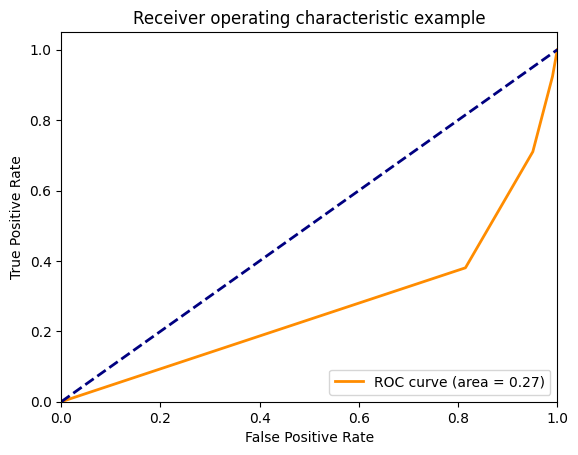

In [22]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1]) # Assuming two classes
y_pred_proba = knn.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
